In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

## Business Understanding

A primeira etapa da metodologia consiste em identificar as reais necessidades do projeto. 
Antes de respondermos algumas perguntas vamos entender um pouco melhor sobre a empresa em questão

<b>Wallmart</b>
<br/>
<br/>
Walmart, Inc., é uma multinacional estadunidense de lojas de departamento. 
A companhia foi fundada por Sam Walton em 1962, incorporada em 31 de outubro de 1969 e feita capital aberto na New York Stock Exchange, em 1972. No ano de 2021, obteve um um lucro de $13.51 Bilhões.Sendo uma das principais lojas de varejo do mundo!

### <p style="color: #2281e6"> <b>Perguntas para esclarecimento do negócio. </b></p>

<b>Qual a necessidade da empresa ? </b>
<br/>
A empresa possui uma necessidade de identificar o faturamento das lojas nos USA. São 45 lojas espalhadas pelo país.

<b>Qual o objetivo do projeto ? </b>
<br/>
Fazer um levantamento do faturamento das 45 lojas e apontar qual seria a melhor loja para expandir o tamanho.

<b>Quais as métricas de sucesso a serem alcançadas ? </b>
<br/>
Identificar a melhor loja para expandir de tamanho




## Data Understanding

A segunda etapa consiste em coletar, organizar e documentar todos os dados que se encontram disponíveis para realizar a análise exploratória. São 4 tasks principais para essa etapa do processo. Coleta inicial dos dados, descrição dos dados, exploração dos dados e qualidade dos dados

### <p style="color: #2281e6"> <b> 1° etapa - Coleta inicial dos dados</b></p>

<b>Os dados estão disponíveis ?</b>
<br/>
Sim. Temos um CSV com todas as informações necessárias para a resolução do problema


### <p style="color: #2281e6"> <b> 2° etapa - Descrição dos dados</b></p>

<b>Qual a estrutura desses dados ?</b>


<img src="explicação-dataset.png" width=70%>

In [4]:
df = pd.read_csv('Walmart.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


### <p style="color: #2281e6"> <b> 3° etapa - Exploração dos dados</b></p>

Entendendo melhor os dados disponíveis.

In [5]:
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

<AxesSubplot:>

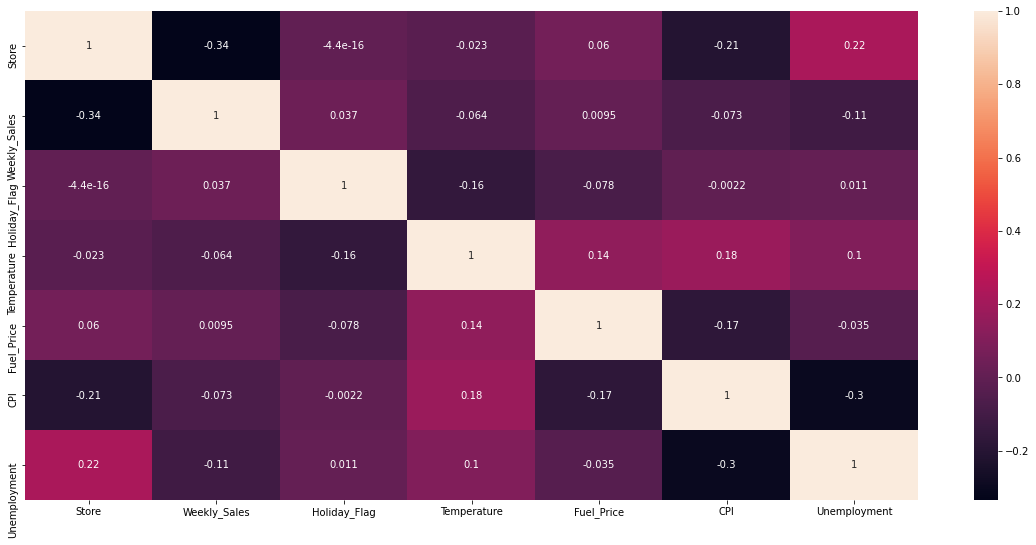

In [6]:
plt.figure(figsize = (20,9))
sns.heatmap(df.corr(),  annot=True)

In [7]:
# Verficando se a quantidade de lojas bate
df['Store'].sort_values(ascending = True).value_counts()

4     143
2     143
10    143
14    143
18    143
22    143
26    143
30    143
34    143
38    143
42    143
3     143
7     143
11    143
15    143
19    143
23    143
27    143
31    143
35    143
39    143
6     143
45    143
8     143
41    143
12    143
16    143
20    143
24    143
28    143
32    143
36    143
40    143
44    143
1     143
5     143
9     143
13    143
17    143
21    143
25    143
29    143
33    143
37    143
43    143
Name: Store, dtype: int64

In [8]:
# Verificando quantos registros existem em uma semana de feriado
df[(df['Store'] == 1) & (df['Holiday_Flag'] == 1)].count()

Store           10
Date            10
Weekly_Sales    10
Holiday_Flag    10
Temperature     10
Fuel_Price      10
CPI             10
Unemployment    10
dtype: int64

## <p style="color: #030ea8"> <b> Gerando insights </b></p>

In [9]:
new_df = df.drop(['Holiday_Flag','Temperature', 'Fuel_Price', 'CPI', 'Unemployment'], axis=1)
new_df.head()

Store        Date  Weekly_Sales
0      1  05-02-2010    1643690.90
1      1  12-02-2010    1641957.44
2      1  19-02-2010    1611968.17
3      1  26-02-2010    1409727.59
4      1  05-03-2010    1554806.68

Verificando a soma de vendas de cada semana agrupado por loja

In [10]:

average_weekly_price = new_df.groupby(['Store', 'Date']).sum()

average_weekly_price = np.round(average_weekly_price / 1000000, 2)
pd.set_option('display.max_rows', None)
average_weekly_price

Weekly_Sales
Store Date                    
1     01-04-2011          1.50
      01-06-2012          1.62
      01-07-2011          1.49
      01-10-2010          1.45
      02-03-2012          1.69
      02-04-2010          1.59
      02-07-2010          1.49
      02-09-2011          1.55
      02-12-2011          1.58
      03-02-2012          1.64
      03-06-2011          1.64
      03-08-2012          1.63
      03-09-2010          1.54
      03-12-2010          1.55
      04-02-2011          1.61
      04-03-2011          1.64
      04-05-2012          1.68
      04-06-2010          1.62
      04-11-2011          1.70
      05-02-2010          1.64
      05-03-2010          1.55
      05-08-2011          1.62
      05-10-2012          1.67
      05-11-2010          1.55
      06-01-2012          1.55
      06-04-2012          1.90
      06-05-2011          1.63
      06-07-2012          1.77
      06-08-2010          1.61
      07-01-2011          1.44
      07-05-2010          1.60
      07-09-2012          1.66
      07-10-2011          1.63
      08-04-2011          1.61
      08-06-2012          1.70
      08-07-2011          1.53
      08-10-2010          1.51
      09-03-2012          1.68
      09-04-2010          1.55
      09-07-2010          1.55
      09-09-2011          1.54
      09-12-2011          1.80
      10-02-2012          1.80
      10-06-2011          1.59
      10-08-2012          1.59
      10-09-2010          1.51
      10-12-2010          1.68
      11-02-2011          1.65
      11-03-2011          1.55
      11-05-2012          1.61
      11-06-2010          1.54
      11-11-2011          1.59
      12-02-2010          1.64
      12-03-2010          1.44
      12-08-2011          1.53
      12-10-2012          1.57
      12-11-2010          1.49
      13-01-2012          1.46
      13-04-2012          1.62
      13-05-2011          1.60
      13-07-2012          1.53
      13-08-2010          1.51
      14-01-2011          1.39
      14-05-2010          1.49
      14-09-2012          1.52
      14-10-2011          1.49
      15-04-2011          1.56
      15-06-2012          1.63
      15-07-2011          1.46
      15-10-2010          1.46
      16-03-2012          1.68
      16-04-2010          1.47
      16-07-2010          1.45
      16-09-2011          1.51
      16-12-2011          1.88
      17-02-2012          1.82
      17-06-2011          1.53
      17-08-2012          1.60
      17-09-2010          1.43
      17-12-2010          1.89
      18-02-2011          1.69
      18-03-2011          1.58
      18-05-2012          1.60
      18-06-2010          1.50
      18-11-2011          1.54
      19-02-2010          1.61
      19-03-2010          1.47
      19-08-2011          1.53
      19-10-2012          1.51
      19-11-2010          1.48
      20-01-2012          1.39
      20-04-2012          1.52
      20-05-2011          1.43
      20-07-2012          1.50
      20-08-2010          1.51
      21-01-2011          1.33
      21-05-2010          1.40
      21-09-2012          1.51
      21-10-2011          1.50
      22-04-2011          1.56
      22-06-2012          1.53
      22-07-2011          1.40
      22-10-2010          1.35
      23-03-2012          1.51
      23-04-2010          1.39
      23-07-2010          1.39
      23-09-2011          1.38
      23-12-2011          2.27
      24-02-2012          1.54
      24-06-2011          1.44
      24-08-2012          1.49
      24-09-2010          1.35
      24-12-2010          2.39
      25-02-2011          1.46
      25-03-2011          1.54
      25-05-2012          1.56
      25-06-2010          1.42
      25-11-2011          2.03
      26-02-2010          1.41
      26-03-2010          1.40
      26-08-2011          1.46
      26-10-2012          1.49
      26-11-2010          1.96
      27-01-2012          1.32
      27-04-2012          1.47
      27-05-2011          1.47
      27-07-2012          1.44
      27-08-2010   

Verificando a soma total das vendas semanais, e agrupando por loja

In [11]:
sum_total = new_df.groupby(['Store']).sum()
sum_total = np.round(sum_total / 1000000, 2)
sum_total.head()

Weekly_Sales
Store              
1            222.40
2            275.38
3             57.59
4            299.54
5             45.48

-----------------------------------------------------------------------------------

Analisando como as vendas se comportam entre as lojas. Incluindo o valor minimo, máximo, média e mediana. 

In [12]:
stores_sales = df.groupby('Store').Weekly_Sales.agg([min, max, 'mean'])

#Modificando as unidades para milhões
stores_sales = np.round(stores_sales / 1000000, 2)
stores_sales.head()

min   max  mean
Store                  
1      1.32  2.39  1.56
2      1.65  3.44  1.93
3      0.34  0.61  0.40
4      1.76  3.68  2.09
5      0.26  0.51  0.32

Plotando um gráfico com os valores máximos, mínimos e médias das vendas das primeiras 25 lojas

<AxesSubplot:xlabel='Store'>

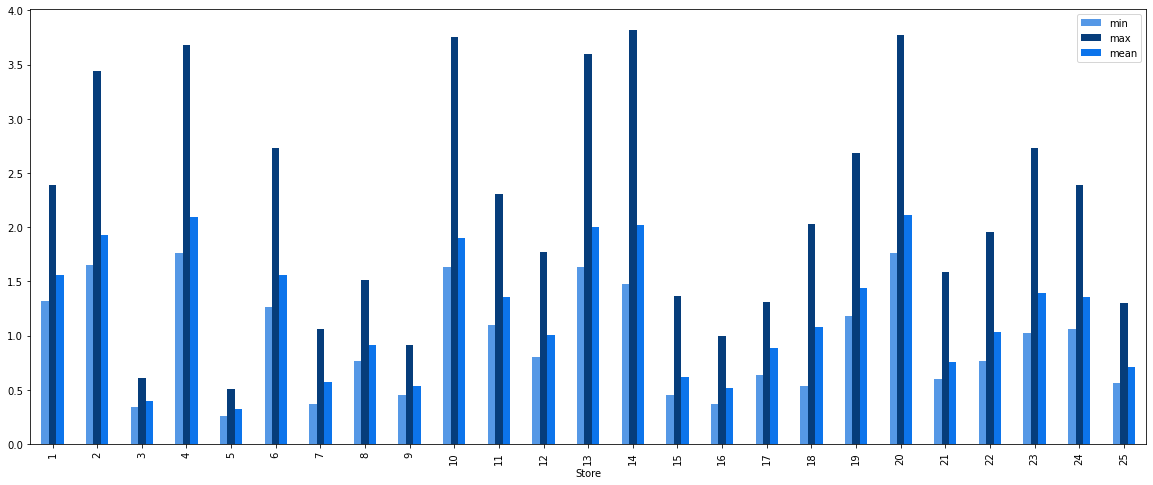

In [13]:
stores_sales[:25].plot(kind="bar", figsize=(20,8), color=['#5598e6', '#063D7B','#0c74eb'])

Verificando as que tiveram um volume "max" maior de vendas

In [14]:
sales_max = stores_sales.sort_values(by= ['max'], ascending =False)
sales_max.head(10)

min   max  mean
Store                  
14     1.48  3.82  2.02
20     1.76  3.77  2.11
10     1.63  3.75  1.90
4      1.76  3.68  2.09
13     1.63  3.60  2.00
2      1.65  3.44  1.93
27     1.26  3.08  1.78
23     1.02  2.73  1.39
6      1.26  2.73  1.56
19     1.18  2.68  1.44

Verificando as que tiveram um volume "max" menor de vendas

In [15]:
sales_max_min = stores_sales.sort_values(by= ['max'], ascending = True)
sales_max_min.head(10)

min   max  mean
Store                  
33     0.21  0.33  0.26
44     0.24  0.38  0.30
36     0.27  0.49  0.37
38     0.30  0.50  0.39
5      0.26  0.51  0.32
30     0.37  0.52  0.44
3      0.34  0.61  0.40
37     0.45  0.61  0.52
42     0.43  0.67  0.56
43     0.51  0.73  0.63

-------------------------------

Salvando em um dataset os 10 primeiros registros que mais venderam

In [16]:
df_teste_maiores_vendas = df.sort_values(by= ['Weekly_Sales'], ascending = False)[:10]
df_teste_maiores_vendas

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
1905     14  24-12-2010    3818686.45             0        30.59       3.141   
2763     20  24-12-2010    3766687.43             0        25.17       3.141   
1333     10  24-12-2010    3749057.69             0        57.06       3.236   
527       4  23-12-2011    3676388.98             0        35.92       3.103   
1762     13  24-12-2010    3595903.20             0        34.90       2.846   
1814     13  23-12-2011    3556766.03             0        24.76       3.186   
2815     20  23-12-2011    3555371.03             0        40.19       3.389   
475       4  24-12-2010    3526713.39             0        43.21       2.887   
1385     10  23-12-2011    3487986.89             0        48.36       3.541   
189       2  24-12-2010    3436007.68             0        49.97       2.886   

             CPI  Unemployment  
1905  182.544590         8.724  
2763  204.637673         7.484  
1333  126.983581         9.003  
527   129.984548         5.143  
1762  126.983581         7.795  
1814  129.984548         6.392  
2815  212.236040         7.082  
475   126.983581         7.127  
1385  129.984548         7.874  
189   211.064660         8.163

Vendo a média da taxa de desemprego das 10 lojas que mais venderam

In [17]:
df_teste_maiores_vendas['Unemployment'].mean(axis=0)

7.478700000000001

In [18]:
df_teste_maiores_vendas['Temperature'].mean(axis=0)

39.013

In [19]:
df_teste_maiores_vendas['CPI'].mean(axis=0)

158.13873501

In [20]:
df_teste_maiores_vendas['Fuel_Price'].mean(axis=0)

3.1355999999999997

-------------------------------

Salvando em um dataset os 10 primeiros registros que menos venderam

In [21]:
df_teste_menores_vendas = df.sort_values(by= ['Weekly_Sales'], ascending = True)[:10]
df_teste_menores_vendas

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
4619     33  03-12-2010     209986.25             0        52.82       3.041   
4614     33  29-10-2010     213538.32             0        71.34       3.130   
4675     33  30-12-2011     215359.21             1        51.60       3.428   
4623     33  31-12-2010     219804.85             1        52.91       3.148   
4671     33  02-12-2011     220060.35             0        59.12       3.701   
4605     33  27-08-2010     224031.19             0        94.00       3.022   
4610     33  01-10-2010     224294.39             0        91.45       3.001   
4617     33  19-11-2010     224639.76             0        61.95       3.047   
4653     33  29-07-2011     224806.96             0        95.28       3.694   
4649     33  01-07-2011     226702.36             0        98.43       3.842   

             CPI  Unemployment  
4619  126.731333         9.265  
4614  126.436419         9.265  
4675  130.071032         8.010  
4623  127.087677         9.265  
4671  129.845967         8.010  
4605  126.089290         9.495  
4610  126.234600         9.265  
4617  126.607200         9.265  
4653  129.167710         8.442  
4649  129.089400         8.442

Vendo a média da taxa de desemprego das 10 lojas que menos venderam

In [22]:
df_teste_menores_vendas['Unemployment'].mean(axis=0)

8.872400000000003

In [23]:
df_teste_menores_vendas['Temperature'].mean(axis=0)

72.88999999999999

In [24]:
df_teste_menores_vendas['CPI'].mean(axis=0)

127.73606291000002

In [25]:
df_teste_menores_vendas['Fuel_Price'].mean(axis=0)

3.3054

### <p style="color: #f58625"> <b> Insights das primeiras analises </b></p>

1° Na ultima analise é possível verificar que a média da taxa de desemprego onde as vendas foram maiores é menor do que onde as vendas foram menores. 

Da para se imaginar que talvez a taxa de desemprego influência no número de vendas

2° As 10 maiores vendas foram feitas na semana do natal entre os dias 23 e 24 de dezembro dos anos de 2010 e 2011

Natal parece ser uma data muito forte e colocabora significativamente no aumento das vendas de algumas lojas.

3° A loja de número 33 detem as 10 menores vendas

Talvez seja interessante analisar o porque essa loja tem as piores vendas.

4° As lojas no frio vendem mais. No frio as pessoas tendem a consumir mais alimentos pois o corpo gasta mais energia para se manter aquecido.

<p style="font-size:16px"><b>Conclusão:</b> Talvez uma loja onde o clima seja frio, tenha uma taxa de desemprego menor
seja uma boa para investir no aumento dessa. Principalmente na semana do natal onde as vendas aumentam consideravelmente.</p>

### <p style="color: #030ea8"> <b>Encontrar um grupo de lojas que se enquadre nas analises acima</b></p>

Encontrando as lojas que tenham as caracteristicas das lojas que mais venderam.

In [26]:
df_analyse_stores = df[(df['Store'] > 20) & (df['Temperature'] < 60) & (df['Unemployment'] < 7)]
df_analyse_stores

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
3146     23  05-02-2010    1364721.58             0        15.25       2.788   
3147     23  12-02-2010    1380892.08             1        18.75       2.771   
3148     23  19-02-2010    1319588.04             0        26.70       2.747   
3149     23  26-02-2010    1198709.65             0        32.68       2.753   
3150     23  05-03-2010    1311175.93             0        33.15       2.766   
3151     23  12-03-2010    1408082.96             0        36.07       2.805   
3152     23  19-03-2010    1229008.32             0        43.01       2.834   
3153     23  26-03-2010    1310701.80             0        38.59       2.831   
3154     23  02-04-2010    1556627.62             0        40.50       2.826   
3155     23  09-04-2010    1264434.70             0        56.82       2.849   
3156     23  16-04-2010    1288823.72             0        44.25       2.885   
3157     23  23-04-2010    1315023.08             0        46.40       2.895   
3158     23  30-04-2010    1259414.52             0        45.47       2.935   
3160     23  14-05-2010    1303055.09             0        45.33       2.983   
3161     23  21-05-2010    1327424.28             0        57.94       2.961   
3164     23  11-06-2010    1439432.06             0        58.35       2.830   
3178     23  17-09-2010    1159132.58             0        55.30       2.716   
3179     23  24-09-2010    1099055.65             0        57.75       2.718   
3181     23  08-10-2010    1179851.68             0        50.75       2.776   
3182     23  15-10-2010    1119809.71             0        45.55       2.878   
3183     23  22-10-2010    1147503.92             0        43.19       2.919   
3184     23  29-10-2010    1112871.23             0        48.68       2.938   
3185     23  05-11-2010    1203119.96             0        36.60       2.938   
3186     23  12-11-2010    1387953.75             0        35.59       2.961   
3187     23  19-11-2010    1314994.32             0        41.66       3.030   
3188     23  26-11-2010    2072685.05             1        34.95       3.070   
3189     23  03-12-2010    1617025.41             0        34.30       3.065   
3190     23  10-12-2010    1872365.99             0        20.12       3.132   
3191     23  17-12-2010    2238573.48             0        23.05       3.139   
3192     23  24-12-2010    2734277.10             0        22.96       3.150   
3193     23  31-12-2010    1169773.85             1        19.05       3.177   
3194     23  07-01-2011    1122034.48             0        27.81       3.193   
3195     23  14-01-2011    1016756.10             0        18.20       3.215   
3196     23  21-01-2011    1110706.06             0        15.58       3.232   
3197     23  28-01-2011    1083657.61             0        10.91       3.243   
3198     23  04-02-2011    1159438.53             0        14.50       3.240   
3199     23  11-02-2011    1249786.40             1        21.52       3.255   
3200     23  18-02-2011    1369971.57             0        26.60       3.263   
3201     23  25-02-2011    1206917.20             0        17.00       3.281   
3202     23  04-03-2011    1301185.28             0        20.67       3.437   
3203     23  11-03-2011    1042043.55             0        29.36       3.600   
3204     23  18-03-2011    1203682.62             0        37.28       3.634   
3205     23  25-03-2011    1148624.83             0        29.11       3.624   
3206     23  01-04-2011    1182694.95             0        29.44       3.638   
3207     23  08-04-2011    1248901.98             0        36.74       3.720   
3208     23  15-04-2011    1263680.51             0        45.51       3.823   
3209     23  22-04-2011    1447301.24             0        39.62       3.919   
3210     23  29-04-2011    1173307.40             0        54.20       3.988   
3211     23  06-05-2011    1359921.13             0        50.07       4.078   
3212  

Verificando qual dessas lojas venderam mais

In [38]:
new_stores = df_analyse_stores.groupby('Store').Weekly_Sales.agg([min, max, 'mean'])
new_stores_arround = np.round(new_stores / 1000000, 2)
new_stores_arround

min   max  mean
Store                  
23     1.02  2.73  1.37
25     0.59  0.68  0.63
40     0.76  1.65  0.95
41     1.08  2.26  1.31
44     0.26  0.38  0.31

Comparando os dados da loja que mais vendeu com a loja que tem potencial de expansão

In [39]:
# LOJA COM PTENCIAL DE CRESCIMENTO
df_new_store_investing = df_analyse_stores.sort_values(by= ['Weekly_Sales'], ascending = False)[:1]
df_new_store_investing

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
3192     23  24-12-2010     2734277.1             0        22.96        3.15   

             CPI  Unemployment  
3192  132.747742         5.287

In [42]:
# LOJA QUE MAIS VENDEU
maior_venda = df.sort_values(by= ['Weekly_Sales'], ascending = False)[:1]
maior_venda

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
1905     14  24-12-2010    3818686.45             0        30.59       3.141   

            CPI  Unemployment  
1905  182.54459         8.724

 -----------------

## <p style="color: #030ea8"> <b>Conclusão</b></p>

A escolha de investimento seria na loja de número 23. Ela tem caracteristica semelhantes a loja 14(que mais vendeu)
Além de possuir alguns pontos que demonstram um potencial de ser a loja que mais vende. Como por exemplo, a taxa de desemprego é menor

### <p style="color: #2281e6"> <b> 4° etapa - Qualidade dos dados</b></p>

In [28]:
#Verificando se possui valores nulos
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [29]:
#Verificando valores estatistico para tentar encontrar algum valor discrepante
df.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

## Data Preparation

Nesta etapa, devemos tratar os dados para nos certificarmos que as informações estão de acordo com o esperado. Consistência de erros e ausência de valores deverão ser resolvidos <br/>
Aqui existem 4 etapas de preparação: Seleção dos dados, Limpeza dos dados, Construção de dados e Integrando dados.

### <p style="color: #2281e6"> <b> 1° etapa - Seleção dos dados</b></p>

Foi definido que para chegar ao nosso objeto, as colunas "Temperature" e "CPI" não seriam necessárias, então foram removidas do dataset

CPI = Índice de preços ao consumidor da semana

Vou decidido remover esse item por ser uma variável volátil com variações semanais e que possui uma correlação negativa com as vendas da semana

In [30]:
clean_df = df.drop(columns=['Temperature', 'CPI'])
clean_df

Store        Date  Weekly_Sales  Holiday_Flag  Fuel_Price  Unemployment
0         1  05-02-2010    1643690.90             0       2.572         8.106
1         1  12-02-2010    1641957.44             1       2.548         8.106
2         1  19-02-2010    1611968.17             0       2.514         8.106
3         1  26-02-2010    1409727.59             0       2.561         8.106
4         1  05-03-2010    1554806.68             0       2.625         8.106
5         1  12-03-2010    1439541.59             0       2.667         8.106
6         1  19-03-2010    1472515.79             0       2.720         8.106
7         1  26-03-2010    1404429.92             0       2.732         8.106
8         1  02-04-2010    1594968.28             0       2.719         7.808
9         1  09-04-2010    1545418.53             0       2.770         7.808
10        1  16-04-2010    1466058.28             0       2.808         7.808
11        1  23-04-2010    1391256.12             0       2.795         7.808
12        1  30-04-2010    1425100.71             0       2.780         7.808
13        1  07-05-2010    1603955.12             0       2.835         7.808
14        1  14-05-2010    1494251.50             0       2.854         7.808
15        1  21-05-2010    1399662.07             0       2.826         7.808
16        1  28-05-2010    1432069.95             0       2.759         7.808
17        1  04-06-2010    1615524.71             0       2.705         7.808
18        1  11-06-2010    1542561.09             0       2.668         7.808
19        1  18-06-2010    1503284.06             0       2.637         7.808
20        1  25-06-2010    1422711.60             0       2.653         7.808
21        1  02-07-2010    1492418.14             0       2.669         7.787
22        1  09-07-2010    1546074.18             0       2.642         7.787
23        1  16-07-2010    1448938.92             0       2.623         7.787
24        1  23-07-2010    1385065.20             0       2.608         7.787
25        1  30-07-2010    1371986.60             0       2.640         7.787
26        1  06-08-2010    1605491.78             0       2.627         7.787
27        1  13-08-2010    1508237.76             0       2.692         7.787
28        1  20-08-2010    1513080.49             0       2.664         7.787
29        1  27-08-2010    1449142.92             0       2.619         7.787
30        1  03-09-2010    1540163.53             0       2.577         7.787
31        1  10-09-2010    1507460.69             1       2.565         7.787
32        1  17-09-2010    1430378.67             0       2.582         7.787
33        1  24-09-2010    1351791.03             0       2.624         7.787
34        1  01-10-2010    1453329.50             0       2.603         7.838
35        1  08-10-2010    1508239.93             0       2.633         7.838
36        1  15-10-2010    1459409.10             0       2.720         7.838
37        1  22-10-2010    1345454.00             0       2.725         7.838
38        1  29-10-2010    1384209.22             0       2.716         7.838
39        1  05-11-2010    1551659.28             0       2.689         7.838
40        1  12-11-2010    1494479.49             0       2.728         7.838
41        1  19-11-2010    1483784.18             0       2.771         7.838
42        1  26-11-2010    1955624.11             1       2.735         7.838
43        1  03-12-2010    1548033.78             0       2.708         7.838
44        1  10-12-2010    1682614.26             0       2.843         7.838
45        1  17-12-2010    1891034.93             0       2.869         7.838
46        1  24-12-2010    2387950.20             0       2.886         7.838
47        1  31-12-2010    1367320.01             1       2.943         7.838
48        1  07-01-2011    1444732.28             0       2.976         7.742
49        1  14-01-2011    1391013.96             0       2.983         7.742
50        1  21-01-2011    1

### <p style="color: #2281e6"> <b> 2° etapa - Limpeza dos dados</b></p>

Nossos dados estão de uma maneira geral, com coerência. Não possuem valores nulos, e nem dados inconsistentes

### <p style="color: #2281e6"> <b> 3° etapa - Construção de dados</b></p>

### <p style="color: #2281e6"> <b> 4° etapa - Integrando dados</b></p>

Não haverá integração de dados

In [31]:
df

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
5         1  12-03-2010    1439541.59             0        57.79       2.667   
6         1  19-03-2010    1472515.79             0        54.58       2.720   
7         1  26-03-2010    1404429.92             0        51.45       2.732   
8         1  02-04-2010    1594968.28             0        62.27       2.719   
9         1  09-04-2010    1545418.53             0        65.86       2.770   
10        1  16-04-2010    1466058.28             0        66.32       2.808   
11        1  23-04-2010    1391256.12             0        64.84       2.795   
12        1  30-04-2010    1425100.71             0        67.41       2.780   
13        1  07-05-2010    1603955.12             0        72.55       2.835   
14        1  14-05-2010    1494251.50             0        74.78       2.854   
15        1  21-05-2010    1399662.07             0        76.44       2.826   
16        1  28-05-2010    1432069.95             0        80.44       2.759   
17        1  04-06-2010    1615524.71             0        80.69       2.705   
18        1  11-06-2010    1542561.09             0        80.43       2.668   
19        1  18-06-2010    1503284.06             0        84.11       2.637   
20        1  25-06-2010    1422711.60             0        84.34       2.653   
21        1  02-07-2010    1492418.14             0        80.91       2.669   
22        1  09-07-2010    1546074.18             0        80.48       2.642   
23        1  16-07-2010    1448938.92             0        83.15       2.623   
24        1  23-07-2010    1385065.20             0        83.36       2.608   
25        1  30-07-2010    1371986.60             0        81.84       2.640   
26        1  06-08-2010    1605491.78             0        87.16       2.627   
27        1  13-08-2010    1508237.76             0        87.00       2.692   
28        1  20-08-2010    1513080.49             0        86.65       2.664   
29        1  27-08-2010    1449142.92             0        85.22       2.619   
30        1  03-09-2010    1540163.53             0        81.21       2.577   
31        1  10-09-2010    1507460.69             1        78.69       2.565   
32        1  17-09-2010    1430378.67             0        82.11       2.582   
33        1  24-09-2010    1351791.03             0        80.94       2.624   
34        1  01-10-2010    1453329.50             0        71.89       2.603   
35        1  08-10-2010    1508239.93             0        63.93       2.633   
36        1  15-10-2010    1459409.10             0        67.18       2.720   
37        1  22-10-2010    1345454.00             0        69.86       2.725   
38        1  29-10-2010    1384209.22             0        69.64       2.716   
39        1  05-11-2010    1551659.28             0        58.74       2.689   
40        1  12-11-2010    1494479.49             0        59.61       2.728   
41        1  19-11-2010    1483784.18             0        51.41       2.771   
42        1  26-11-2010    1955624.11             1        64.52       2.735   
43        1  03-12-2010    1548033.78             0        49.27       2.708   
44        1  10-12-2010    1682614.26             0        46.33       2.843   
45        1  17-12-2010    1891034.93             0        49.84       2.869   
46        1  24-12-2010    2387950.20             0        52.33       2.886   
47        1  31-12-2010    1367320.01             1        48.43       2.943   
48        1  07-01-2011    1444732.28             0        48.27       2.976   
49    